# Analysis of Nike Run Club Songs
- Exploring songs uploaded by the spotify user Nike Run Club https://open.spotify.com/user/nikerunclub?si=30e01984c90c47d4.
- Use Spotify API https://developer.spotify.com/

## Libraries

In [31]:
import spotify.sync as spotify
import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import preprocessing
import base64
import requests
from urllib.parse import urlencode

# Set the path
import os
current_path = os.getcwd()

# Setting colors
cmap = plt.cm.summer
colors = [cmap(i) for i in np.linspace(0.1,0.85,5)]
color = 'tab:green'
cm = [cmap(1.*i/2) for i in [0, 5]]

sns.set(style='darkgrid')

## Get data

In [2]:
# Use data saved in csv format
folder = current_path + '/data/nike_run_club_songs.csv'
df_songs = pd.read_csv(folder, index_col=[0])
df_songs

,spotify_id,title,artist,feat_artists,spotify_url,popularity,lyrics,duration_ms,song_art_image_url,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spechiness
0,3mRlFZHUyvJbPTlkzg4LyJ,Roses,SAINt JHN,[],https://open.spotify.com/track/3mRlFZHUyvJbPTl...,66,Roses\nI walked in the corner with the body sc...,173610,https://images.genius.com/1edc1620b1ecb3c7133b...,0.782,...,5,-6.473,0,NaN,0.342000,0.000019,0.1330,0.2800,102.008,0.0611
1,2wB0rnmsJOv1eqrRjQB5yZ,My Affection,Summer Walker,[],https://open.spotify.com/track/2wB0rnmsJOv1eqr...,33,Seen my teens flew by in a coach seat\nSince w...,213933,https://images.genius.com/639577dc3e9b2a46974d...,0.616,...,7,-7.703,1,NaN,0.358000,0.000000,0.0941,0.2370,76.950,0.1740
2,76DHyqVuAlzxQJZHFajoBY,Mood Swings,A Boogie Wit da Hoodie,[],https://open.spotify.com/track/76DHyqVuAlzxQJZ...,27,"Wheezy outta here\nBeast, beast\n\nI'm a beast...",156960,https://images.genius.com/2c3a6a104f978d8bc922...,0.943,...,4,-5.511,0,NaN,0.241000,0.000009,0.0974,0.8930,120.077,0.0986
3,75VJBp3JE7W3oKoFeq1esH,Chicago Freestyle,Drake,[],https://open.spotify.com/track/75VJBp3JE7W3oKo...,47,"Two-thirty, baby, won't you meet me by The Bea...",220487,https://images.genius.com/37db50145d22a7fa8fa4...,0.745,...,2,-7.518,0,NaN,0.619000,0.000000,0.1130,0.0396,122.982,0.3260
4,51rPRW8NjxZoWPPjnRGzHw,Tadow,Masego,[],https://open.spotify.com/track/51rPRW8NjxZoWPP...,76,"Yeeah, ooh, yeh\nAyy, ayy, ayy, oh, ahh\nAyy, ...",301893,https://images.genius.com/e06844c842bb821f5b6a...,0.704,...,9,-6.407,0,NaN,0.669000,0.000086,0.1110,0.3130,121.726,0.0604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,6K3eLl3YBYOi0VoYfY9jb6,Sneakers,Various Artists,[],https://open.spotify.com/track/6K3eLl3YBYOi0Vo...,0,6/1 (화)\nB.I - WATERFALL - 12/12\nBlew.D - Ble...,238344,https://images.genius.com/59033dc02f1500e042f3...,0.794,...,5,-6.642,0,NaN,0.015000,0.619000,0.0779,0.0663,144.997,0.0426
268,3KH8lL0YigCOb8ndVndxgR,James Baby,Stro Elliot,[],https://open.spotify.com/track/3KH8lL0YigCOb8n...,30,NaN,126362,NaN,0.901,...,0,-11.638,1,NaN,0.000099,0.466000,0.1140,0.5450,111.046,0.0628
269,668XfwYfRJ6R1QtV6bELXu,Boom,Ta-ku,[],https://open.spotify.com/track/668XfwYfRJ6R1Qt...,19,Guess you nod your head so hair it'll give you...,71186,https://images.genius.com/57a5057d7a95fbc63e3f...,0.805,...,6,-7.610,1,NaN,0.403000,0.179000,0.6420,0.4420,91.001,0.4520
270,2iAvOMJknYUX8W06ozwoJi,1969,El Ten Eleven,[],https://open.spotify.com/track/2iAvOMJknYUX8W0...,25,NaN,46880,NaN,0.281,...,4,-14.788,1,NaN,0.165000,0.974000,0.6430,0.2750,65.761,0.0376


It is worth mentioning that audio features describe:
- **popularity**: the popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past;
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic;
- **danceability**: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable;
- **duration_ms**: the duration of the track in milliseconds;
- **energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy;
- **instrumentalness**: predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0;
- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on;
- **liveness**: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live;
- **loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db;
- **mode**: mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0;
- **tempo**: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration;
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

They can be summarized in: 
- **Mood**: Danceability, Valence, Energy, Tempo, Key, Mode
- **Properties**: Loudness, Instrumentalness, Duration_ms
- **Context**: Liveness, Acousticness, Popularity

In [3]:
# Define group of columns

audio_features_col = ['popularity',
                     'duration_ms',
                     'danceability',
                     'energy',
                     'loudness',
                     'acousticness',
                     'instrumentalness',
                     'liveness',
                     'valence',
                     'tempo']

metadata_col = ['spotify_id',
                'title',
                'artist',
                'feat_artists',
                'spotify_url',
                'song_art_image_url',
                'lyrics']

categorical_col = ['mode',
                  'key']

In [4]:
# Look at only audio fearures
df_songs[audio_features_col]

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo
0,66,173610,0.782,0.500,-6.473,0.342000,0.000019,0.1330,0.2800,102.008
1,33,213933,0.616,0.516,-7.703,0.358000,0.000000,0.0941,0.2370,76.950
2,27,156960,0.943,0.670,-5.511,0.241000,0.000009,0.0974,0.8930,120.077
3,47,220487,0.745,0.446,-7.518,0.619000,0.000000,0.1130,0.0396,122.982
4,76,301893,0.704,0.487,-6.407,0.669000,0.000086,0.1110,0.3130,121.726
...,...,...,...,...,...,...,...,...,...,...
267,0,238344,0.794,0.782,-6.642,0.015000,0.619000,0.0779,0.0663,144.997
268,30,126362,0.901,0.644,-11.638,0.000099,0.466000,0.1140,0.5450,111.046
269,19,71186,0.805,0.841,-7.610,0.403000,0.179000,0.6420,0.4420,91.001
270,25,46880,0.281,0.310,-14.788,0.165000,0.974000,0.6430,0.2750,65.761


In [5]:
# Look at only audio fearures
df_songs[categorical_col]

,mode,key
0,0,5
1,1,7
2,0,4
3,0,2
4,0,9
...,...,...
267,0,5
268,1,0
269,1,6
270,1,4


In [6]:
df_songs[metadata_col]

,spotify_id,title,artist,feat_artists,spotify_url,song_art_image_url,lyrics
0,3mRlFZHUyvJbPTlkzg4LyJ,Roses,SAINt JHN,[],https://open.spotify.com/track/3mRlFZHUyvJbPTl...,https://images.genius.com/1edc1620b1ecb3c7133b...,Roses\nI walked in the corner with the body sc...
1,2wB0rnmsJOv1eqrRjQB5yZ,My Affection,Summer Walker,[],https://open.spotify.com/track/2wB0rnmsJOv1eqr...,https://images.genius.com/639577dc3e9b2a46974d...,Seen my teens flew by in a coach seat\nSince w...
2,76DHyqVuAlzxQJZHFajoBY,Mood Swings,A Boogie Wit da Hoodie,[],https://open.spotify.com/track/76DHyqVuAlzxQJZ...,https://images.genius.com/2c3a6a104f978d8bc922...,"Wheezy outta here\nBeast, beast\n\nI'm a beast..."
3,75VJBp3JE7W3oKoFeq1esH,Chicago Freestyle,Drake,[],https://open.spotify.com/track/75VJBp3JE7W3oKo...,https://images.genius.com/37db50145d22a7fa8fa4...,"Two-thirty, baby, won't you meet me by The Bea..."
4,51rPRW8NjxZoWPPjnRGzHw,Tadow,Masego,[],https://open.spotify.com/track/51rPRW8NjxZoWPP...,https://images.genius.com/e06844c842bb821f5b6a...,"Yeeah, ooh, yeh\nAyy, ayy, ayy, oh, ahh\nAyy, ..."
...,...,...,...,...,...,...,...
267,6K3eLl3YBYOi0VoYfY9jb6,Sneakers,Various Artists,[],https://open.spotify.com/track/6K3eLl3YBYOi0Vo...,https://images.genius.com/59033dc02f1500e042f3...,6/1 (화)\nB.I - WATERFALL - 12/12\nBlew.D - Ble...
268,3KH8lL0YigCOb8ndVndxgR,James Baby,Stro Elliot,[],https://open.spotify.com/track/3KH8lL0YigCOb8n...,NaN,NaN
269,668XfwYfRJ6R1QtV6bELXu,Boom,Ta-ku,[],https://open.spotify.com/track/668XfwYfRJ6R1Qt...,https://images.genius.com/57a5057d7a95fbc63e3f...,Guess you nod your head so hair it'll give you...
270,2iAvOMJknYUX8W06ozwoJi,1969,El Ten Eleven,[],https://open.spotify.com/track/2iAvOMJknYUX8W0...,NaN,NaN


## Data pre-processing

### Drop missing value

In [7]:
# Drop columns if all value are missing
df_songs = df_songs.dropna(axis='columns', how='all')

### Transform necessary columns to numerical

In [8]:
# Transform column to numeric
df_songs.loc[:, 'popularity'] = pd.to_numeric(df_songs.loc[:, ('popularity')])
df_songs.loc[:, 'duration_ms'] = pd.to_numeric(df_songs.loc[:, ('duration_ms')])
df_songs.loc[:, 'mode'] = pd.to_numeric(df_songs.loc[:, ('mode')])

/Users/m0mt1/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### One hot encoding for categorical features

In [9]:
# Since key features is a categorical one, use one-hot-encoding
dummies = pd.get_dummies(df_songs['key'])

# Dictionary to map the key
key_dict ={0: 'C', 1: 'Db', 2: 'D', 3: 'Eb', 4: 'E', 5: 'F', 6: 'Gb', 7: 'G', 8: 'Ab', 9: 'A', 10: 'Bb', 11: 'B'}

dummies.rename(columns=key_dict, inplace=True)

dummies

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
267,0,0,0,0,0,1,0,0,0,0,0,0
268,1,0,0,0,0,0,0,0,0,0,0,0
269,0,0,0,0,0,0,1,0,0,0,0,0
270,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
# Drop key features
df_songs.drop('key', axis=1, inplace=True)

# Update categorical features columns
categorical_col = ['mode', 
                   'C', 
                   'Db', 
                   'D', 
                   'Eb',
                   'E', 
                   'F', 
                   'Gb', 
                   'G', 
                   'Ab', 
                   'A', 
                   'Bb', 
                   'B']


# Get the new database after one-hot-encoding
df_songs = pd.concat([df_songs, dummies], axis=1)

df_songs[audio_features_col + categorical_col]

/Users/m0mt1/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,...,D,Eb,E,F,Gb,G,Ab,A,Bb,B
0,66,173610,0.782,0.500,-6.473,0.342000,0.000019,0.1330,0.2800,102.008,...,0,0,0,1,0,0,0,0,0,0
1,33,213933,0.616,0.516,-7.703,0.358000,0.000000,0.0941,0.2370,76.950,...,0,0,0,0,0,1,0,0,0,0
2,27,156960,0.943,0.670,-5.511,0.241000,0.000009,0.0974,0.8930,120.077,...,0,0,1,0,0,0,0,0,0,0
3,47,220487,0.745,0.446,-7.518,0.619000,0.000000,0.1130,0.0396,122.982,...,1,0,0,0,0,0,0,0,0,0
4,76,301893,0.704,0.487,-6.407,0.669000,0.000086,0.1110,0.3130,121.726,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0,238344,0.794,0.782,-6.642,0.015000,0.619000,0.0779,0.0663,144.997,...,0,0,0,1,0,0,0,0,0,0
268,30,126362,0.901,0.644,-11.638,0.000099,0.466000,0.1140,0.5450,111.046,...,0,0,0,0,0,0,0,0,0,0
269,19,71186,0.805,0.841,-7.610,0.403000,0.179000,0.6420,0.4420,91.001,...,0,0,0,0,1,0,0,0,0,0
270,25,46880,0.281,0.310,-14.788,0.165000,0.974000,0.6430,0.2750,65.761,...,0,0,1,0,0,0,0,0,0,0


## Songs analysis

### Basic statistics of numerical audio features

In [11]:
# Get some statistics of numerical features
df_songs[audio_features_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,266.0,38.917293,25.581404,0.000000,17.500000,44.500000,59.00000,86.000
duration_ms,266.0,215826.210526,71204.775627,12666.000000,177102.250000,212212.000000,242375.25000,509538.000
danceability,266.0,0.617827,0.182772,0.000000,0.533500,0.652000,0.74475,0.963
energy,266.0,0.653307,0.236008,0.002760,0.546250,0.697500,0.83275,0.993
loudness,266.0,-8.141297,5.264290,-29.774000,-9.618500,-6.533500,-4.95225,-1.019
acousticness,266.0,0.234976,0.297784,0.000037,0.014925,0.086400,0.35400,0.992
instrumentalness,266.0,0.275656,0.378793,0.000000,0.000004,0.004155,0.72175,0.974
liveness,266.0,0.164398,0.115964,0.020800,0.095300,0.120000,0.18325,0.664
valence,266.0,0.442419,0.264587,0.000000,0.235250,0.420500,0.64850,0.952
tempo,266.0,120.153293,28.113043,0.000000,104.952250,120.024500,128.60625,203.712


### Features Kernel Density Estimation

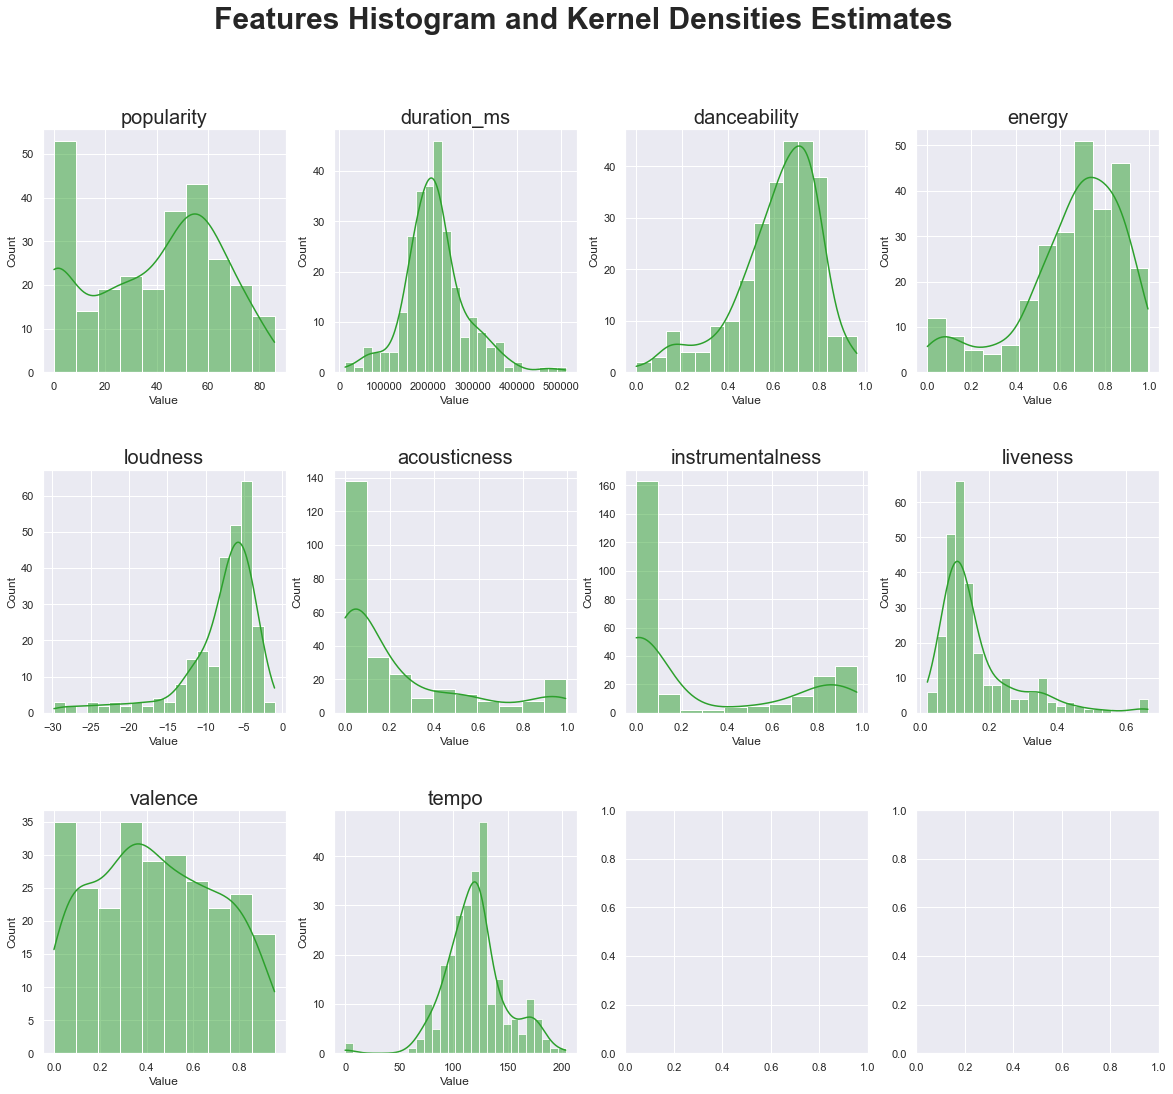

In [12]:
# Set rows and columns
nrows = 3
ncols = 4
tot_num_features = len(audio_features_col)

# Create figure
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 17))
plt.subplots_adjust(hspace=0.4)
for row in range(nrows):
    for col in range(ncols):
        i = ncols * row + col
        if i < tot_num_features:
            feature = df_songs[audio_features_col].columns[i]
            sns.histplot(df_songs[audio_features_col][feature], kde=True, color=color, ax=ax[row,col])
            ax[row, col].set_title(label=f'{feature}', fontsize=20)
            ax[row, col].set(xlabel='Value', ylabel='Count')
        else:
            pass
plt.suptitle('Features bar chart and Kernel Densities Estimates', fontsize=30, weight='bold')
plt.show()

### Correlation of audio features

<AxesSubplot:>

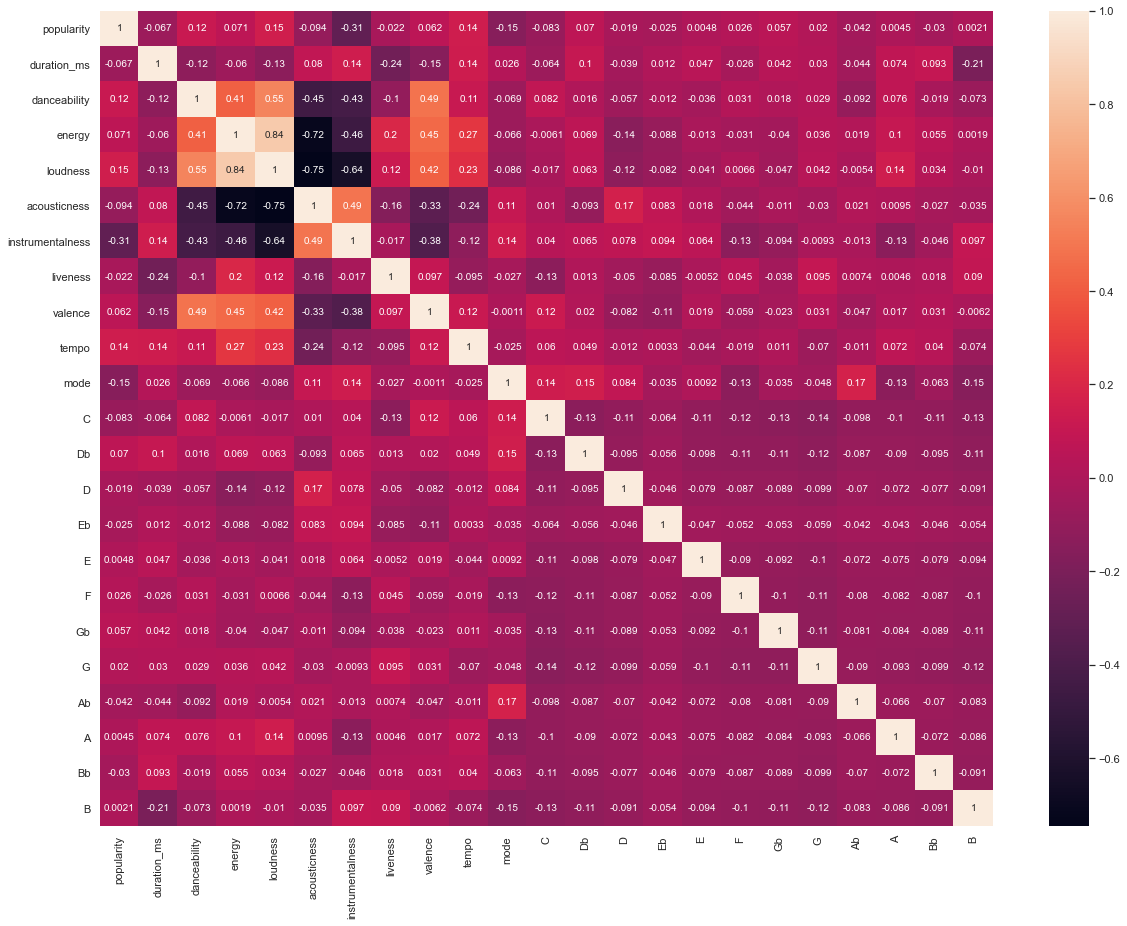

In [13]:
corr = df_songs[audio_features_col + categorical_col].corr()

%matplotlib inline

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

### Popular word in the title

In [14]:
# Write title of songs as a uniqu4 string
text = ""
for title in df_songs.title:
    for word in title.split():
        text = text + " " + word

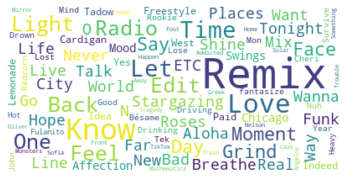

In [15]:
#text = df_songs['title'].to_list()
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Comparison with top 100 songs of 2021
Use dataset audio features of ~600k songs released in between 1922 and 2021. Here more info https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks. Keep just the top 100 songs by popularity

In [16]:
folder = current_path + '/data/top_100_songs.csv'
df_tot_tracks = pd.read_csv(folder, index_col=[0])

In [17]:
# Get top 100 songs by popularity
df_popular = df_tot_tracks.sort_values('popularity', ascending = False)
df_popular

,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
id,,,,,,,,,,,,,,,,,,,
4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,4
7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.1320,143.874,4
3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.4720,149.996,4
5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.6440,118.051,4
6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.5530,83.970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59qrUpoplZxbIZxk6X0Bm3,Take You Dancing,87,190306,0,['Jason Derulo'],['07YZf4WDAMNwqr4jfgOZ8y'],2020-07-22,0.789,0.711,2,-4.248,1,0.0410,0.03320,0.000000,0.0876,0.7530,112.985,4
2bgcUk2A3jjKbCJ7KPquTi,Mi Niña,87,213314,0,"['Wisin', 'Myke Towers', 'Los Legendarios']","['3E6xrwgnVfYCrCs0ePERDz', '7iK8PXO48WeuP03g8Y...",2020-09-23,0.823,0.821,8,-3.402,0,0.1660,0.31000,0.000004,0.1430,0.7910,99.999,4
2U5WueTLIK5WJLD7mvDODv,Wishing Well,87,194621,1,['Juice WRLD'],['4MCBfE4596Uoi2O4DtmEMz'],2020-07-10,0.650,0.613,9,-6.130,0,0.1280,0.00336,0.000000,0.2670,0.0804,149.972,4


In [18]:
# Function to normalize column of a dataset
def normalize_df(df):
    columns = df.columns.to_list()
    index = df_radar_chart.index
    x = df.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, columns=columns, index=index)

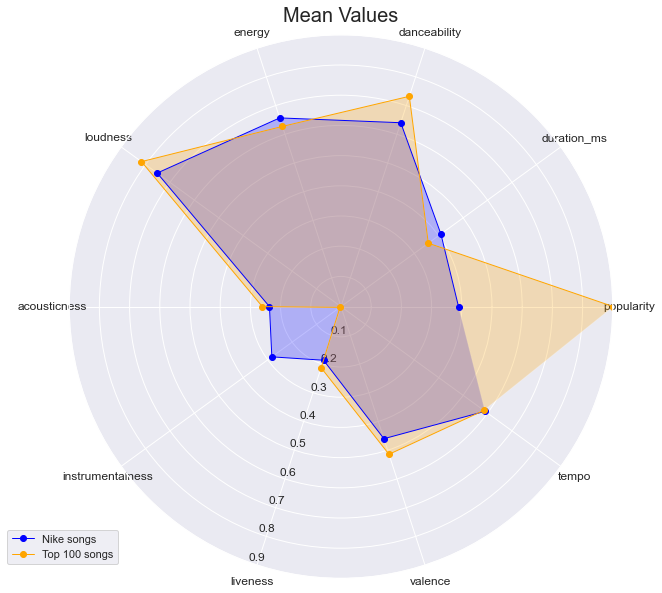

In [19]:
# Merge nike songs and popular in the same dateset, so possible to normalize them
df_radar_chart = pd.concat([df_songs[audio_features_col], df_popular[audio_features_col]], keys=['nike', 'popular'])

# Normalize data
df_radar_chart_norm = normalize_df(df_radar_chart)

# Get means
mean_nike = df_radar_chart_norm.filter(like = 'nike', axis=0).mean().tolist()
mean_popular = df_radar_chart_norm.filter(like = 'popular', axis=0).mean().tolist()

# Set the figure
angles = np.linspace(0, 2*np.pi, len(audio_features_col), endpoint=False)
fig = plt.figure(figsize = (22, 22))

# Set axis
ax = fig.add_subplot(221, polar=True)
ax.plot(angles, mean_nike, 'o-', linewidth=1, label = "Nike songs", color='blue')
ax.fill(angles, mean_nike, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, audio_features_col, fontsize = 12)

ax.set_rlabel_position(250)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', 
                                                            '0.8', '0.9'], size=12)
plt.ylim(0, 0.9)

ax.plot(angles, mean_popular, 'o-', linewidth=1, label = "Top 100 songs", color='orange')
ax.fill(angles, mean_popular, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values', fontsize = 20)
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

# Get raccomendations
- Get songs raccomendations based on artist, genres, songs and audio features. 
- Use API call from https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-recommendations

In [24]:
# Setting up spotify credentials
spotify_client_id = '7579892d543649e7a49bdbfce7d40a7d'
spotify_client_secret = 'fac7d31f6e224591a66e2cfe717cbcd3'
spotify_client_creds = f'{spotify_client_id}:{spotify_client_secret}'
spotify_client_creds_b64 = base64.b64encode(spotify_client_creds.encode())
    
# Using client ID and secret to get a token to be used for each requests
# https://developer.spotify.com/documentation/general/guides/authorization-guide/#client-credentials-flow
spotify_token_url = 'https://accounts.spotify.com/api/token' 
spotify_token_data = {
    'grant_type': 'client_credentials'
}

spotify_token_headers = {
    'Authorization': f"Basic {spotify_client_creds_b64.decode()}" #<base64 encoded client_id:client_secret>
}

# Get the token with a POST request
r = requests.post(spotify_token_url, data=spotify_token_data, headers=spotify_token_headers)
valid_request = r.status_code in range(200, 299)
if valid_request:
#     now = datetime.datetime.now
    spotify_access_token = r.json()['access_token']
#     expires_in = r.json()['expires_in'] # in seconds
#     expires = now + datetime.timedelta(seconds=expires_in)
#     did_expire = expires < now

spotify_headers = {
    "Authorization": f"Bearer {spotify_access_token}"
}

In [32]:
# Set parameters seed seed_artists, seed_genres, and seed_tracks are mandatory (maximum or five items per parameters)
seed_artists =
seed_genres =
seed_tracks =

parameters = urlencode({"", "limit":30, "target_danceability":0.9})
lookup_url = f"https://api.spotify.com/v1/recommendations?{parameters}"

# Get recomendations, seed seed_artists, seed_genres, and seed_tracks are
nike_reccomendations = requests.get(lookup_url, headers=spotify_headers)

In [40]:
df_songs

,spotify_id,title,artist,feat_artists,spotify_url,popularity,lyrics,duration_ms,song_art_image_url,danceability,...,D,Eb,E,F,Gb,G,Ab,A,Bb,B
0,3mRlFZHUyvJbPTlkzg4LyJ,Roses,SAINt JHN,[],https://open.spotify.com/track/3mRlFZHUyvJbPTl...,66,Roses\nI walked in the corner with the body sc...,173610,https://images.genius.com/1edc1620b1ecb3c7133b...,0.782,...,0,0,0,1,0,0,0,0,0,0
1,2wB0rnmsJOv1eqrRjQB5yZ,My Affection,Summer Walker,[],https://open.spotify.com/track/2wB0rnmsJOv1eqr...,33,Seen my teens flew by in a coach seat\nSince w...,213933,https://images.genius.com/639577dc3e9b2a46974d...,0.616,...,0,0,0,0,0,1,0,0,0,0
2,76DHyqVuAlzxQJZHFajoBY,Mood Swings,A Boogie Wit da Hoodie,[],https://open.spotify.com/track/76DHyqVuAlzxQJZ...,27,"Wheezy outta here\nBeast, beast\n\nI'm a beast...",156960,https://images.genius.com/2c3a6a104f978d8bc922...,0.943,...,0,0,1,0,0,0,0,0,0,0
3,75VJBp3JE7W3oKoFeq1esH,Chicago Freestyle,Drake,[],https://open.spotify.com/track/75VJBp3JE7W3oKo...,47,"Two-thirty, baby, won't you meet me by The Bea...",220487,https://images.genius.com/37db50145d22a7fa8fa4...,0.745,...,1,0,0,0,0,0,0,0,0,0
4,51rPRW8NjxZoWPPjnRGzHw,Tadow,Masego,[],https://open.spotify.com/track/51rPRW8NjxZoWPP...,76,"Yeeah, ooh, yeh\nAyy, ayy, ayy, oh, ahh\nAyy, ...",301893,https://images.genius.com/e06844c842bb821f5b6a...,0.704,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,6K3eLl3YBYOi0VoYfY9jb6,Sneakers,Various Artists,[],https://open.spotify.com/track/6K3eLl3YBYOi0Vo...,0,6/1 (화)\nB.I - WATERFALL - 12/12\nBlew.D - Ble...,238344,https://images.genius.com/59033dc02f1500e042f3...,0.794,...,0,0,0,1,0,0,0,0,0,0
268,3KH8lL0YigCOb8ndVndxgR,James Baby,Stro Elliot,[],https://open.spotify.com/track/3KH8lL0YigCOb8n...,30,NaN,126362,NaN,0.901,...,0,0,0,0,0,0,0,0,0,0
269,668XfwYfRJ6R1QtV6bELXu,Boom,Ta-ku,[],https://open.spotify.com/track/668XfwYfRJ6R1Qt...,19,Guess you nod your head so hair it'll give you...,71186,https://images.genius.com/57a5057d7a95fbc63e3f...,0.805,...,0,0,0,0,1,0,0,0,0,0
270,2iAvOMJknYUX8W06ozwoJi,1969,El Ten Eleven,[],https://open.spotify.com/track/2iAvOMJknYUX8W0...,25,NaN,46880,NaN,0.281,...,0,0,1,0,0,0,0,0,0,0
